In [1]:
#Import the libraries 

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [3]:
import plotly.tools as tls
import plotly.offline as py
from plotly.offline import init_notebook_mode,iplot,plot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
import warnings 

%matplotlib inline

rcParams['figure.figsize']=12,6

In [4]:
df=pd.read_csv('real_estate_db.csv',encoding='ISO-8859-1')

In [5]:
#Check the mssing value in dataset

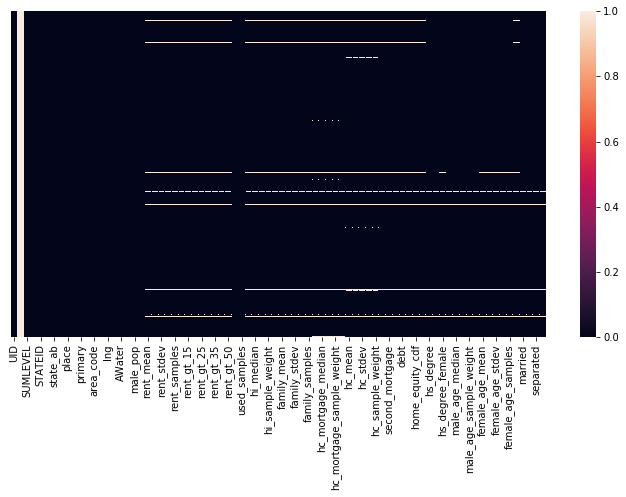

In [6]:
sns.heatmap(df.isnull(),yticklabels=False)

In [7]:
df.columns

Index(['UID', 'BLOCKID', 'SUMLEVEL', 'COUNTYID', 'STATEID', 'state',
       'state_ab', 'city', 'place', 'type', 'primary', 'zip_code', 'area_code',
       'lat', 'lng', 'ALand', 'AWater', 'pop', 'male_pop', 'female_pop',
       'rent_mean', 'rent_median', 'rent_stdev', 'rent_sample_weight',
       'rent_samples', 'rent_gt_10', 'rent_gt_15', 'rent_gt_20', 'rent_gt_25',
       'rent_gt_30', 'rent_gt_35', 'rent_gt_40', 'rent_gt_50',
       'universe_samples', 'used_samples', 'hi_mean', 'hi_median', 'hi_stdev',
       'hi_sample_weight', 'hi_samples', 'family_mean', 'family_median',
       'family_stdev', 'family_sample_weight', 'family_samples',
       'hc_mortgage_mean', 'hc_mortgage_median', 'hc_mortgage_stdev',
       'hc_mortgage_sample_weight', 'hc_mortgage_samples', 'hc_mean',
       'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight',
       'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt',
       'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', '

In [8]:
del df['BLOCKID']

In [9]:
del df['UID']

In [10]:
df.shape

(39030, 78)

In [11]:
df['type'].value_counts()

City       21718
Town        5300
CDP         5216
Village     4572
Borough     1735
Urban        489
Name: type, dtype: int64

In [12]:
#Visulize the same in pie chart

In [13]:
types=round(df['type'].value_counts()/len(df['type'])*100,2)

labels=list(types.index)
values=list(types.values)

trace1=go.Pie(labels=labels,values=values,marker=dict(colors=['red']))

layout=go.Layout(title='Distribution type',legend=dict(orientation='h'));

fig=go.Figure(data=[trace1],layout=layout)

iplot(fig)

In [14]:
#Visulize the count of each categorical feature using drop down

In [15]:
state_count=df['state'].value_counts()
city_count=df['city'].value_counts()
place_count=df['place'].value_counts()
premary_count=df['primary'].value_counts()

In [16]:
trace1=go.Bar(x=state_count[:20].values[::-1],
              y=state_count[:20].index[::-1],
              orientation='h',
                  name='Top 20 States',
                  marker=dict(
                      color=city_count[:20].values[::-1],
                      colorscale='Viridis',
                      reversescale=True
                  ))
trace2=go.Bar(x=city_count[:20].values[::-1],
              y=city_count[:20].index[::-1],
              orientation='h',
              name='Top 20 Cities',
              marker=dict(
                  color=city_count[:20].values[::-1],
                  colorscale='Viridis',
                  reversescale=True
                ))

trace3=go.Histogram(y=sorted(df['type'],reverse=True),histnorm='percent',orientation='h',name='Type Count')

trace4=go.Bar(x=place_count[:20].values[::-1],
              y=place_count[:20].values[::-1],
              orientation='h',
              name='Top 20 places',
              marker=dict(
                  color=city_count[:20].values[::-1],
                  colorscale='Viridis',
                  reversescale=True
            ))

data = [trace1,trace2,trace3,trace4]

updatemenus=list([
            dict(active=-1,
                  x=-0.15,
                  buttons=list([
                      dict(
                          label='State Count',
                          method='update',
                          args=[{'visible':[True,False,False,False]},
                                {'Title': 'Top 20 State Count'}]),
                      dict(
                          label = 'City Count',
                          method = 'update',
                         args = [{'visible': [False, True, False, False]},
                                 {'title': 'TOP 20 City Count'}]),

                    dict(
                         label = 'Type Count',
                         method = 'update',
                         args = [{'visible': [False, False, True, False]},
                         {'title': 'Type Counts'}]),

                    dict(
                         label = 'Place Count',
                         method = 'update',
                         args = [{'visible': [False, False, False, True]},
                        {'title': ' Top 20 Place Count'}])
                    ]),
                 )
])
layout = dict(title='The count of the principal Categorical Features (Select from Dropdown)', 
              showlegend=False,updatemenus=updatemenus)
fig = dict(data=data, layout=layout)

iplot(fig)

In [17]:
#Box plot of city

In [19]:
trace1=go.Box(
    x=df[df.city.isin(city_count[:15].index.values)]['city'],
    y=df[df.city.isin(city_count[:15].index.values)]['rent_median'],
    showlegend=False
)

trace2=go.Box(
    x=df[df.city.isin(city_count[:15].index.values)]['city'],
    y=df[df.city.isin(city_count[:15].index.values)]['family_median'],
    showlegend=False
)

trace3=go.Box(
    x=df[df.city.isin(city_count[:15].index.values)]['city'],
     y=df[df.city.isin(city_count[:15].index.values)]['hi_median'],
    showlegend=False
)

trace4=go.Box(
    x=df[df.city.isin(city_count[:15].index.values)]['city'],
     y=df[df.city.isin(city_count[:15].index.values)]['hc_mortgage_mean'],
    showlegend=False
)

data=[trace1,trace2,trace3,trace4]

updatemenus=list([
        dict(active=-1,
            x=-0.15,
             buttons=list([
                 dict(
                     label='City Rent Boxplot',
                     method='update',
                     args=[{'visible':[True, False, False, False]},
                           {'title': 'Top 15 City-Rent Median'}]),
                 
                 dict(
                     label='City Family Boxplot',
                     method='update',
                     args=[{'visible':[False, True, False, False]},
                          {'title': 'TOP 15 Citys - Family Income Median'}]),
                 
                dict(
                 label = 'City House Inc',
                 method = 'update',
                 args = [{'visible': [False, False, True, False]},
                     {'title': 'TOP 15 Citys - House income Median'}]),

            dict(
                 label =  'City HC Mortage',
                 method = 'update',
                 args = [{'visible': [False, False, False, True]},
                     {'title': 'TOP 15 Citys - Home Cost Mortage'}])
                 ]),
            )
])

layout=dict(title='Citys BoxPlots of Medians (Select from Dropdown)',
           showlegend=False,
            updatemenus=updatemenus)

fig=dict(data=data,layout=layout)

iplot(fig,filename='dropdown')

In [30]:
trace0=go.Box(
    x=df[df.city.isin(city_count[:10].index.values)]['city'],
    y=df[df.city.isin(city_count[:10].index.values)]['rent_median'],
    showlegend=False
)

trace1=go.Box(
    x=df[df.city.isin(city_count[:10].index.values)]['city'],
    y=df[df.city.isin(city_count[:10].index.values)]['family_median'],
    showlegend=False
)

trace2=go.Box(
    x=df[df.city.isin(city_count[:10].index.values)]['city'],
    y=df[df.city.isin(city_count[:10].index.values)]['hc_mortgage_median'],
    showlegend=False
)

trace3 = go.Histogram(
    x=df[df.city.isin(city_count[:20].index.values)]['city'], histnorm='percent',
    showlegend=False
)

trace4=go.Histogram(
    x=np.log(df['family_median']).sample(5000),histnorm='percent',autobinx=True,showlegend=True,name='Family'
)

trace5=go.Histogram(
    x=np.log(df['hc_mortgage_median']).sample(5000),histnorm='percent',autobinx=True,showlegend=True,name='HC mort'
)

trace6=go.Histogram(
    x=np.log(df['rent_median']).sample(5000),histnorm='percent',autobinx=True,showlegend=True,name='Rent'
)

fig = tls.make_subplots(rows=2, cols=3, specs=[[{'colspan': 2}, None, {}], [{}, {}, {}]],
                          subplot_titles=("Citys Count",
                                          "Medians Distribuition", 
                                          "HC Morttage Median",
                                          "Family Median", 
                                          "Rent Median"))
    
#setting the flags
fig.append_trace(trace0,2,1)
fig.append_trace(trace1,2,3)
fig.append_trace(trace2, 2, 2)
fig.append_trace(trace3, 1, 1)
fig.append_trace(trace4, 1, 3)
fig.append_trace(trace5, 1, 3)
fig.append_trace(trace6, 1, 3)

fig['layout'].update(showlegend=True,title="Some Top Citys Distribuitions")
iplot(fig)
plt.show()

This is the format of your plot grid:
[ (1,1) x1,y1           -      ]  [ (1,3) x2,y2 ]
[ (2,1) x3,y3 ]  [ (2,2) x4,y4 ]  [ (2,3) x5,y5 ]

